In [1]:
using Pkg
Pkg.activate("../..")

  Activating project at `~/Documents/repos/nanoOpt.jl`


In [2]:
using Measures,LaTeXStrings,Plots; pyplot()

Plots.PyPlotBackend()

In [3]:
include("../../src/NanoOpt.jl")

isommerfield (generic function with 4 methods)

In [72]:
mat1 = material(1.5^2,1.0)
mat2 = material(1.0,1.0)
layer =  layerstructure([mat1,mat2],[0.0,],"down");

In [73]:
λ = 600
k₀ = 2π/λ
z₀ = 10.
dip = [1 0 0; 0 1 0; 0 0 1];

In [74]:
θ₂ = 0.5*π*collect(LinRange(-1,1,501))
θ₁ = π .+ θ₂
ϕ = 0 .* θ₁;

In [75]:
k₁ = mat1.k(k₀)
k₂ = mat2.k(k₀)
k1z = sqrt.(k₁^2 .- k₁^2 .* sin.(θ₁).^2)
k2z = sqrt.(Complex.(k₂^2 .- k₁^2 .* sin.(θ₁).^2))

s₁ = zeros(length(θ₁),size(dip,1))
s₂ = zeros(length(θ₂),size(dip,1));

In [76]:
for i in axes(dip,1) 
    p₁ = dip[i,1] .* sin.(ϕ) .- dip[i,2].*cos.(ϕ)
    p₂ = dip[i,1].*cos.(ϕ).*cos.(θ₂) .+ dip[i,1].*sin.(ϕ).*cos.(θ₂) .- dip[i,3].*sin.(θ₂)
    p₃ = dip[i,1].*k1z./k₁.*cos.(ϕ) .+ dip[i,2].*k1z./k₁.*sin.(ϕ) .- dip[i,3].*k₂./k₁.*sin.(θ₁)
    
    vals1 = rtcoeffs(layer,k₀,abs.(k₂.*sin.(θ₂)),"down"); refl = vals1.r
    vals2 = rtcoeffs(layer,k₀,abs.(k₁.*sin.(θ₁)),"down"); trans = vals2.t

    Ps₁ = (1 .+ exp(2im*k₂*z₀).*refl.TE).*p₁
    Ps₂ = (1 .+ exp(2im*k₂*z₀).*refl.TM).*p₂

    s₂[:,i] = abs.(Ps₁).^2 + abs.(Ps₂).^2

    Ps₁ = trans.TE.*p₁
    Ps₂ = trans.TE.*p₃

    s₁[:,i] = abs.(k1z./k2z).^2 .*(abs.(Ps₁).^2  + abs.(Ps₂).^2)
end

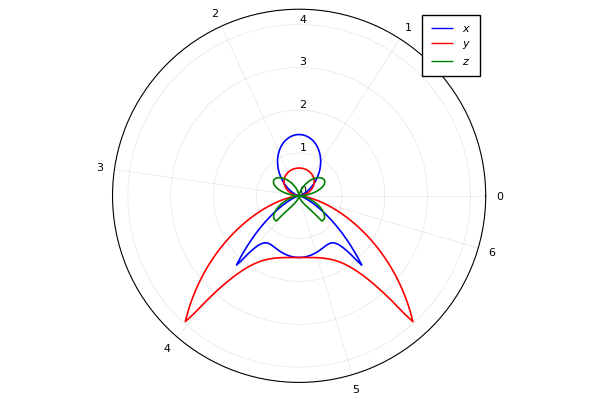

In [77]:
plot(0.5π  .- θ₁,s₁[:,1],c=:blue,lw=1.2,proj=:polar,label=L"x")
plot!(0.5π  .- θ₂,s₂[:,1],c=:blue,lw=1.2,proj=:polar,label="")
plot!(0.5π  .- θ₁,s₁[:,2],c=:red,lw=1.2,proj=:polar,label=L"y")
plot!(0.5π  .- θ₂,s₂[:,2],c=:red,lw=1.2,proj=:polar,label="")
plot!(0.5π  .- θ₁,s₁[:,3],c=:green,lw=1.2,proj=:polar,label=L"z")
plot!(0.5π  .- θ₂,s₂[:,3],c=:green,lw=1.2,proj=:polar,label="")